## Line depth-dependence wavelength shifts

In [36]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 12,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'legend.fontsize': 13,
        'xtick.labelsize': 13,
        'ytick.labelsize': 13,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [42]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\valores_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\valores_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).drop_duplicates('Observed wavelength',keep='first').reset_index(drop=True) #Dont take repeated values when concatenate
 
#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

### Granulation patterns

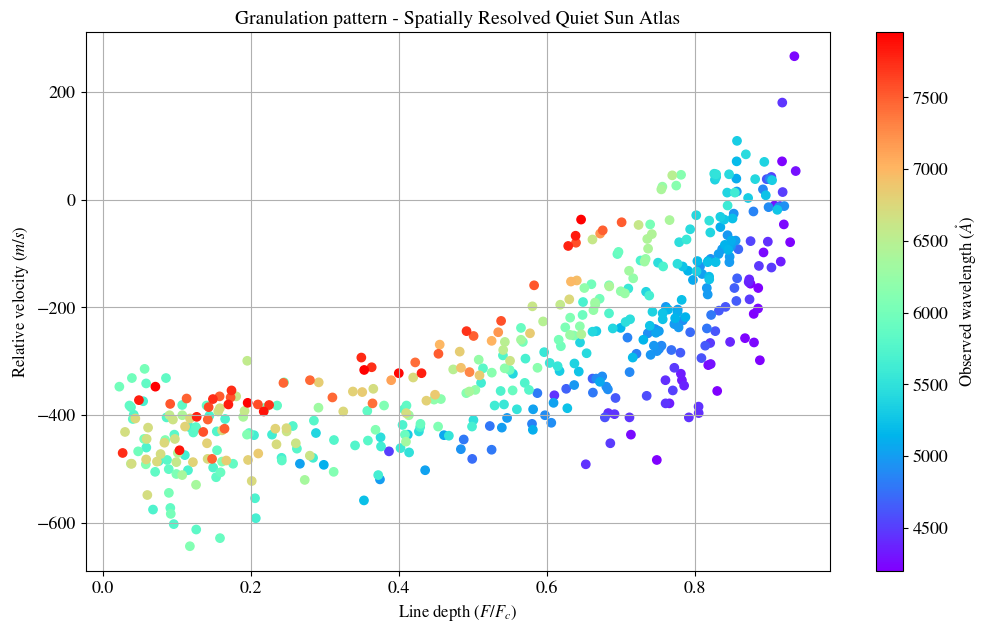

In [38]:
fig1, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Granulation pattern - Spatially Resolved Quiet Sun Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)

ax.grid()

# fig1.savefig('GranulationPattern_SPA.pdf')

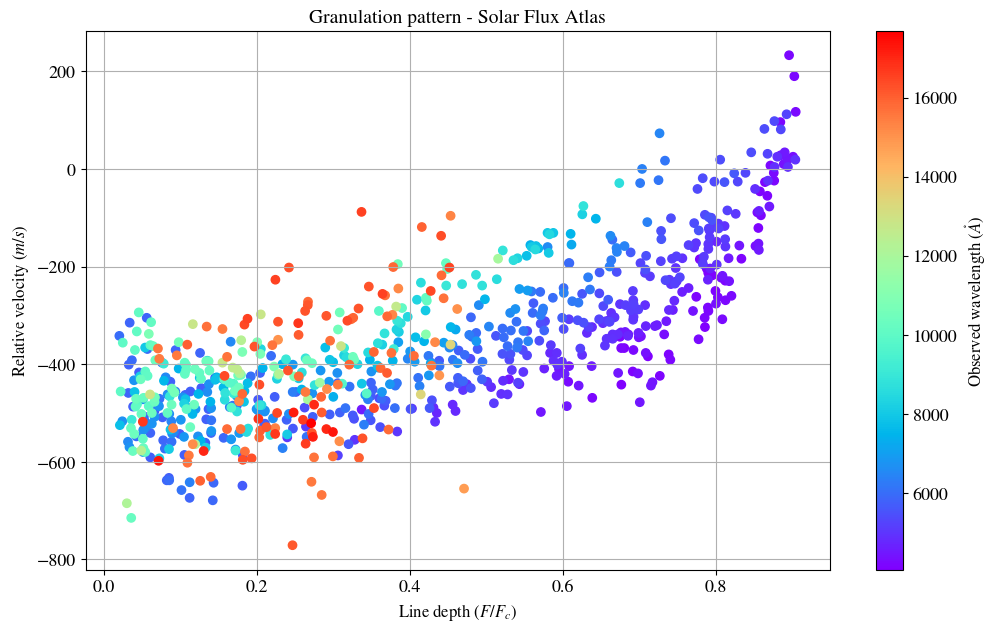

In [43]:
fig2, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(ALL_data['Line Depth'],ALL_data['Velocity'],c=ALL_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Granulation pattern - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)

ax.grid()

# fig2.savefig('GranulationPattern_ALL.pdf')

## Attempt for characterization

### Ellwarth standard curve (include the other atlas)

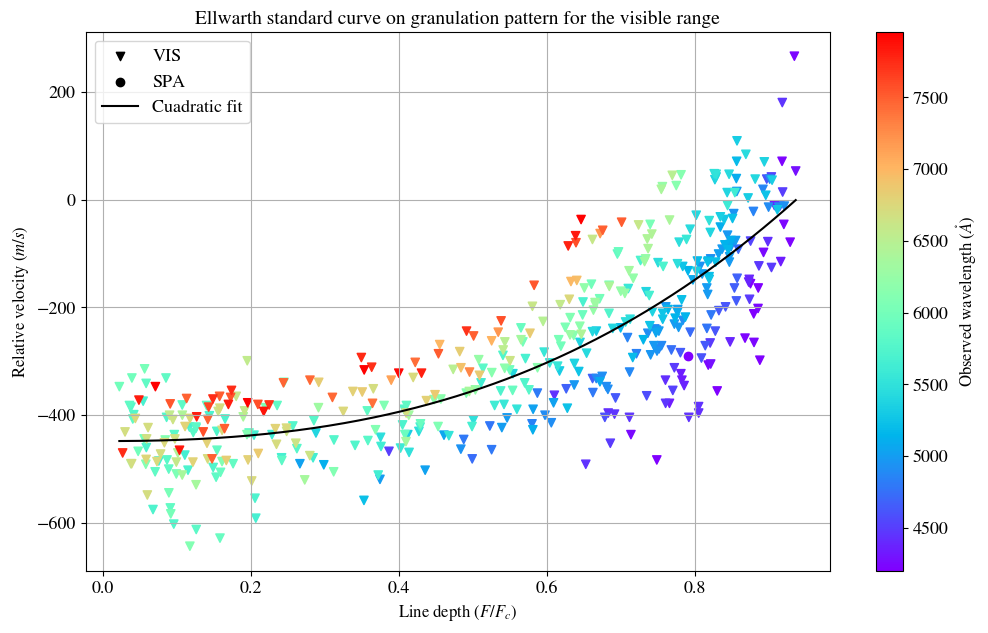

In [45]:
fig4, ax = plt.subplots(1,1,figsize=(12,7))

#Take the same range for the Ellwarth
VIS_data = VIS_data[VIS_data['Emitted wavelength'].between(min(SPA_data['Emitted wavelength']),min(SPA_data['Emitted wavelength']))].reset_index(drop=True)

pol = Polynomial.fit(pd.concat([VIS_data['Line Depth'],SPA_data['Line Depth']],axis=0),pd.concat([VIS_data['Velocity'],SPA_data['Velocity']],axis=0), 3)
param = pol.convert().coef
values_flux = np.linspace(min(pd.concat([VIS_data['Line Depth'],SPA_data['Line Depth']],axis=0)), max(pd.concat([VIS_data['Line Depth'],SPA_data['Line Depth']],axis=0)), len(pd.concat([VIS_data['Line Depth'],SPA_data['Line Depth']],axis=0)))
flux_fit = poly.polyval(values_flux,param)

scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.scatter([],[],marker='v',color='k',label='VIS')
ax.scatter([],[],marker='o',color='k',label='SPA')

ax.plot(values_flux,flux_fit,color='k',label='Cuadratic fit')

ax.set_title('Ellwarth standard curve on granulation pattern for the visible range',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.legend()
ax.grid()

# fig4.savefig('Standard curve_Ellwarth.pdf')

#### The deeper lines, coming from the spatially center of the sun, are affected by the differential rotation significantly than highest lines

## Wavelength-dependence of line depth for specific velocity

### Visible range

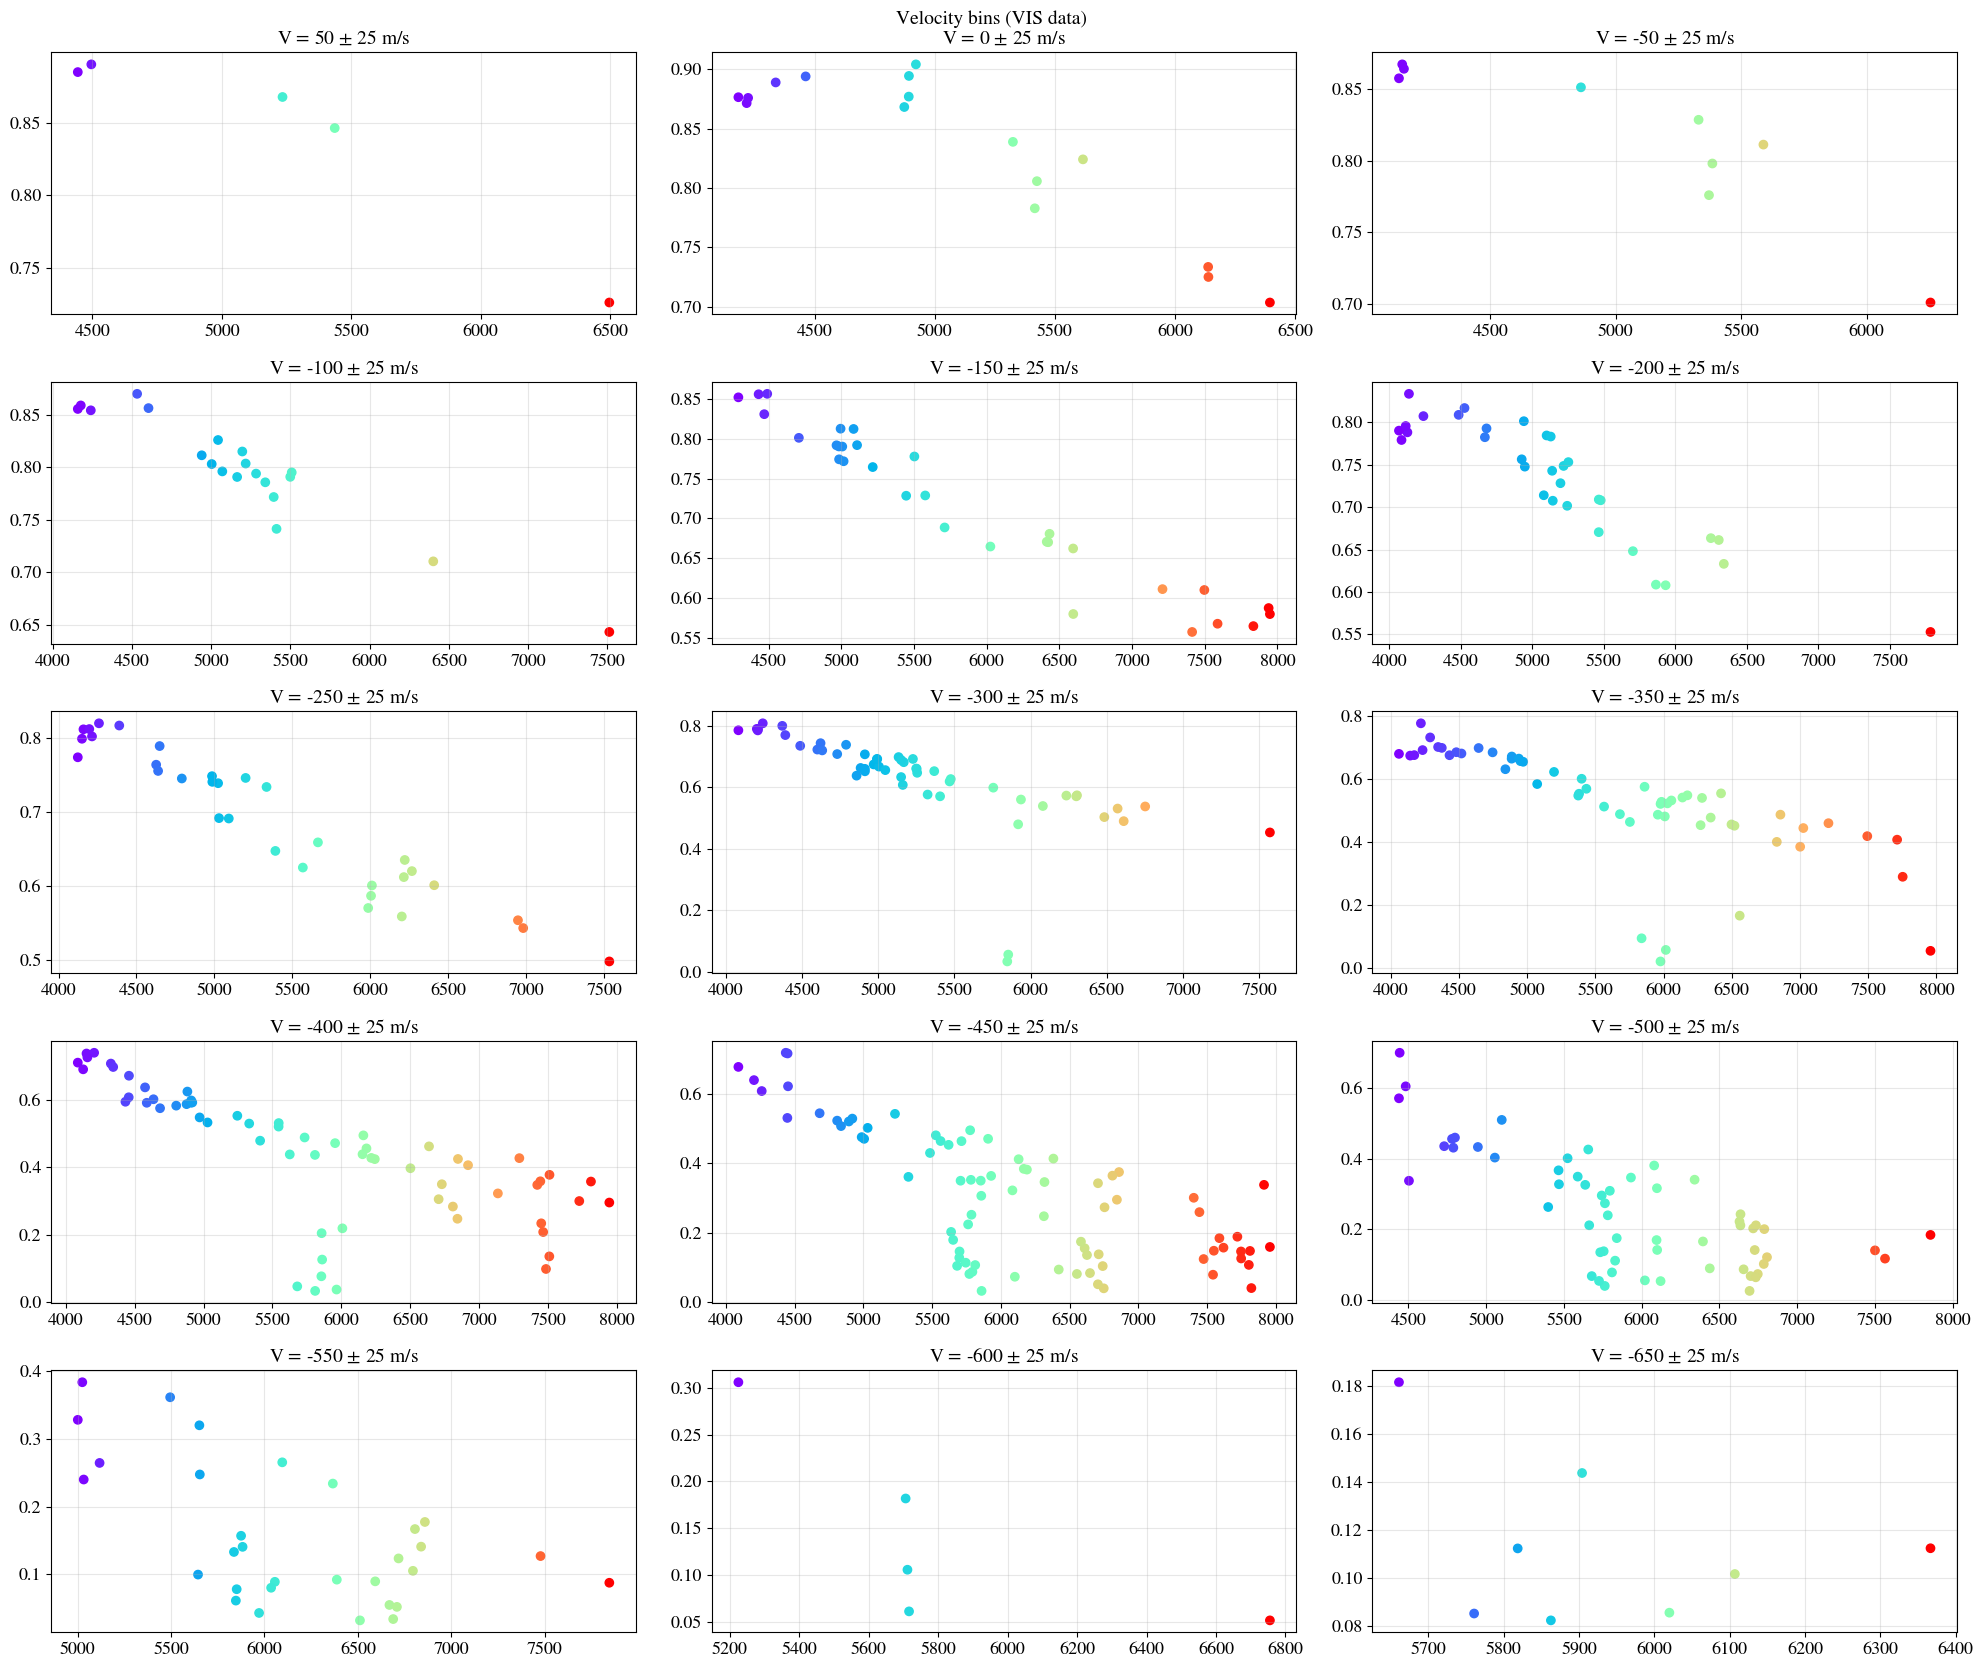

In [6]:
#Organize the dataframe wtih ascending velocities
VIS_listed = VIS_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_VIS = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_VIS.append(VIS_listed[VIS_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_VIS[i]['Observed wavelength'],1-velocity_VIS[i]['Flux'],c=velocity_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

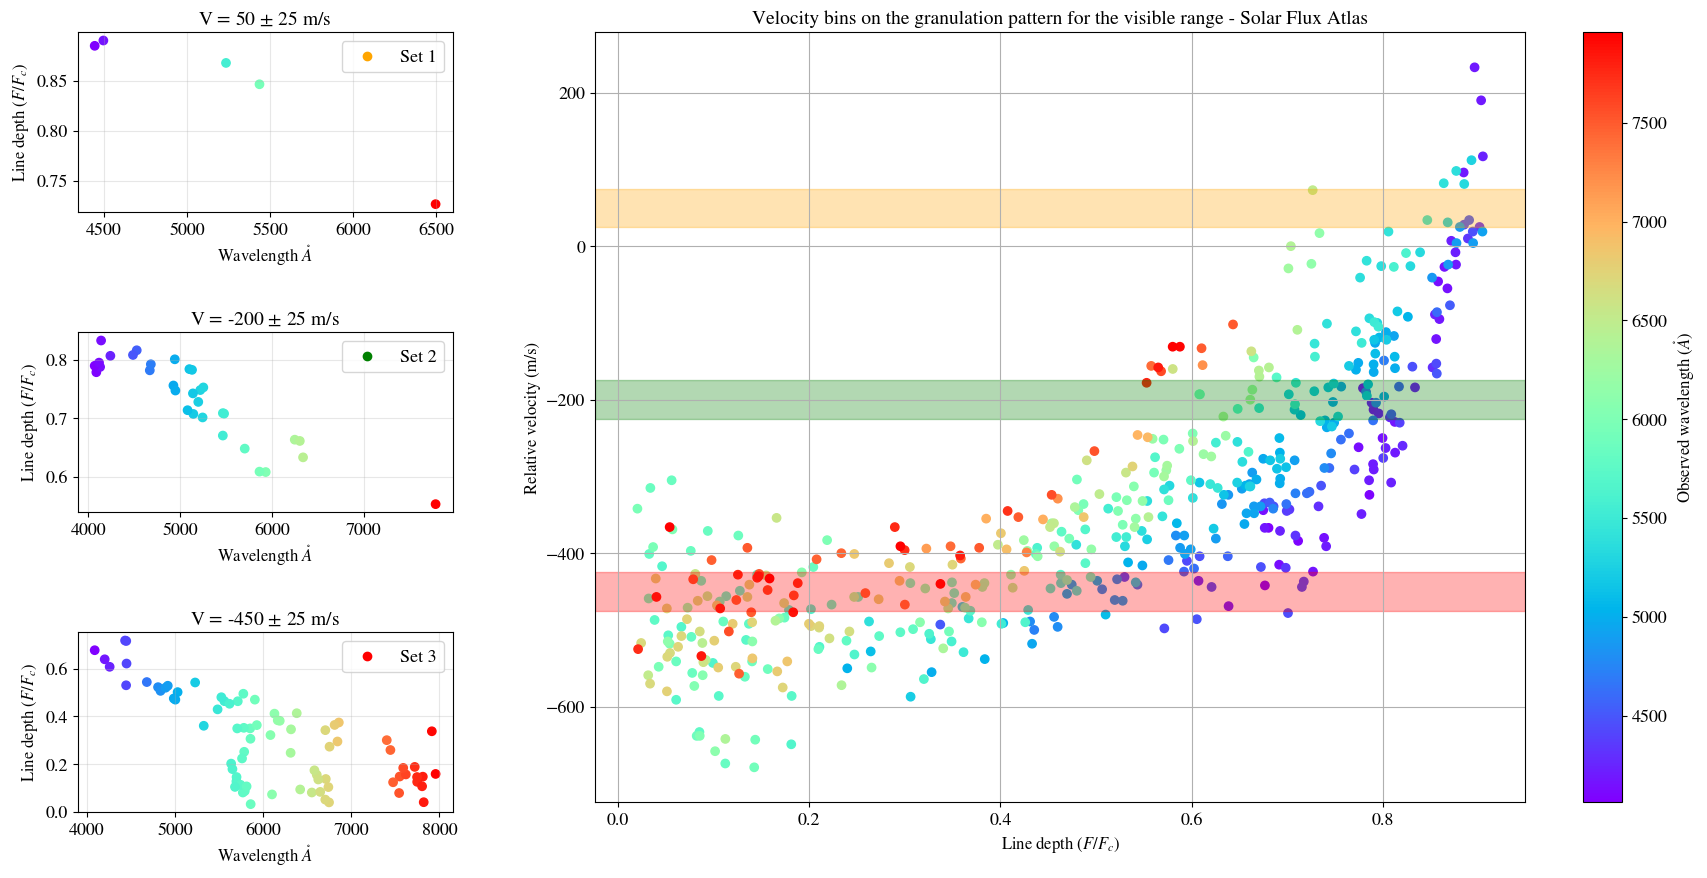

In [7]:
#Graph with the velocity bins remarked
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(1-VIS_data['Flux'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Velocity bins on the granulation pattern for the visible range - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity (m/s)',fontsize=12)
ax.grid()

#Big figure with velocity bins
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Position and size [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graph the zoom
i=0
ax_inseti.scatter(velocity_VIS[i]['Observed wavelength'],1-velocity_VIS[i]['Flux'],c=velocity_VIS[i]["Observed wavelength"],cmap='rainbow')
ax_inseti.scatter([],[], c='orange', label='Set 1')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.grid(True, alpha=0.3)
ax_inseti.set_xlabel(r'Wavelength $\mathring{A}$')
ax_inseti.set_ylabel(r'Line depth $(F/F_{c})$')
ax_inseti.legend()

j=5
ax_insetj.scatter(velocity_VIS[j]['Observed wavelength'],1-velocity_VIS[j]['Flux'],c=velocity_VIS[j]["Observed wavelength"],cmap='rainbow')
ax_insetj.scatter([],[], c='green', label='Set 2')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetj.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetj.grid(True, alpha=0.3)
ax_insetj.legend()

k=10
ax_insetk.scatter(velocity_VIS[k]['Observed wavelength'],1-velocity_VIS[k]['Flux'],c=velocity_VIS[k]["Observed wavelength"],cmap='rainbow')
ax_insetk.scatter([],[], c='red', label='Set 3')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetk.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetk.grid(True, alpha=0.3)
ax_insetk.legend()


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

plt.show()

# fig.savefig('Velocity bins VIS_plot.pdf', bbox_inches='tight')

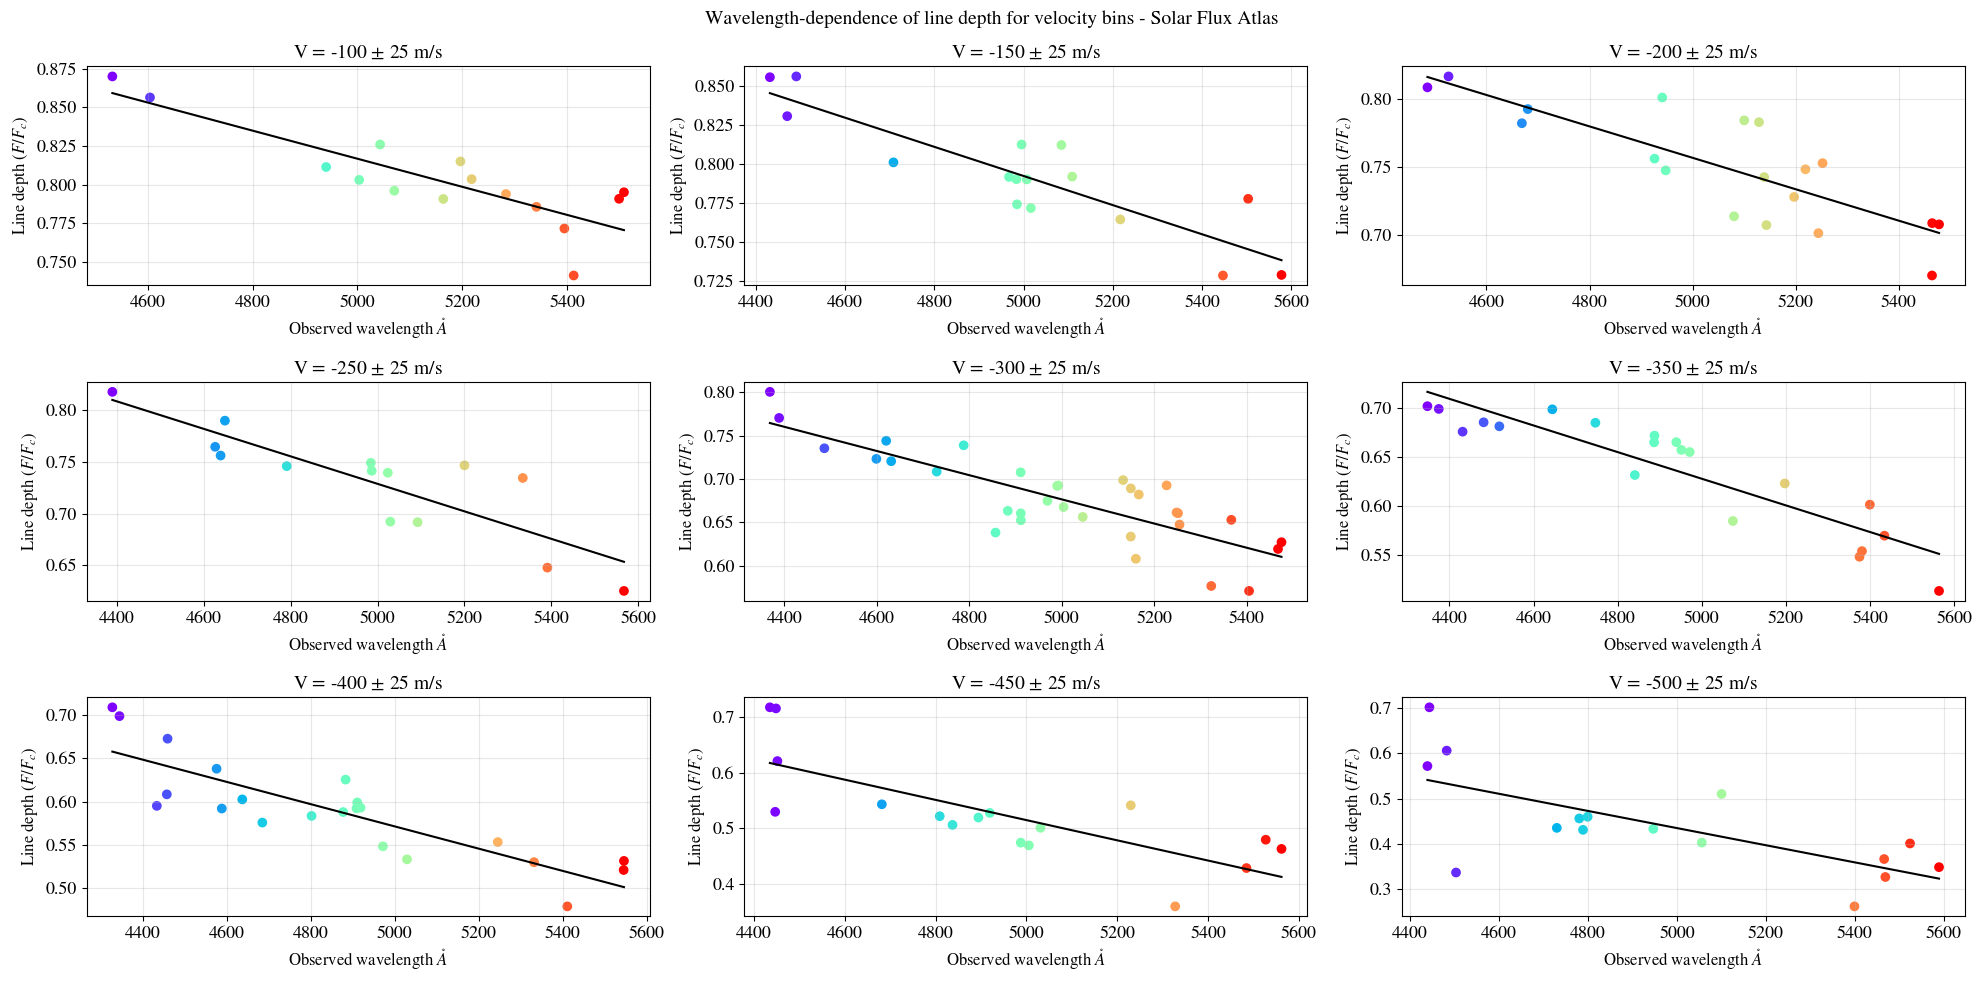

In [8]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_VIS = []
values_param_VIS = []
wave_VIS = []

for i in range(3,12):
    new_data = velocity_VIS[i][velocity_VIS[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]
    pol = Polynomial.fit(new_data['Observed wavelength'],1-new_data['Flux'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    fits_VIS.append([values_flux,flux_fit])
    values_param_VIS.append(pd.DataFrame(param))
    wave_VIS.append(new_data)

values_param_VIS = pd.concat(values_param_VIS,axis=1).T.reset_index(drop=True)
values_param_VIS.columns = ['A','B']
values_param_VIS = values_param_VIS.set_axis(markers[3:12], axis=0)

#Take just the values that we want
velocity_VIS_new = velocity_VIS[3:12]
markers_new = markers[3:12]

fig4, axes = plt.subplots(3, 3, figsize=(20, 10))
fig4.suptitle('Wavelength-dependence of line depth for velocity bins - Solar Flux Atlas',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        
        ax.scatter(wave_VIS[i]['Observed wavelength'],1-wave_VIS[i]['Flux'],c=wave_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],color='k')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth $(F/F_{c})$',fontsize=12)
        ax.set_xlabel(r'Observed wavelength $\mathring{A}$',fontsize=12)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig4.savefig('Velocity bins VIS.pdf')

In [9]:
values_param_VIS

,A,B
-100,1.270417,-0.000091
-150,1.260197,-0.000094
-200,1.334044,-0.000115
-250,1.392099,-0.000133
-300,1.372480,-0.000139
-350,1.310685,-0.000137
-400,1.211962,-0.000128
-450,1.421268,-0.000181
-500,1.378785,-0.000189


### Spatial data

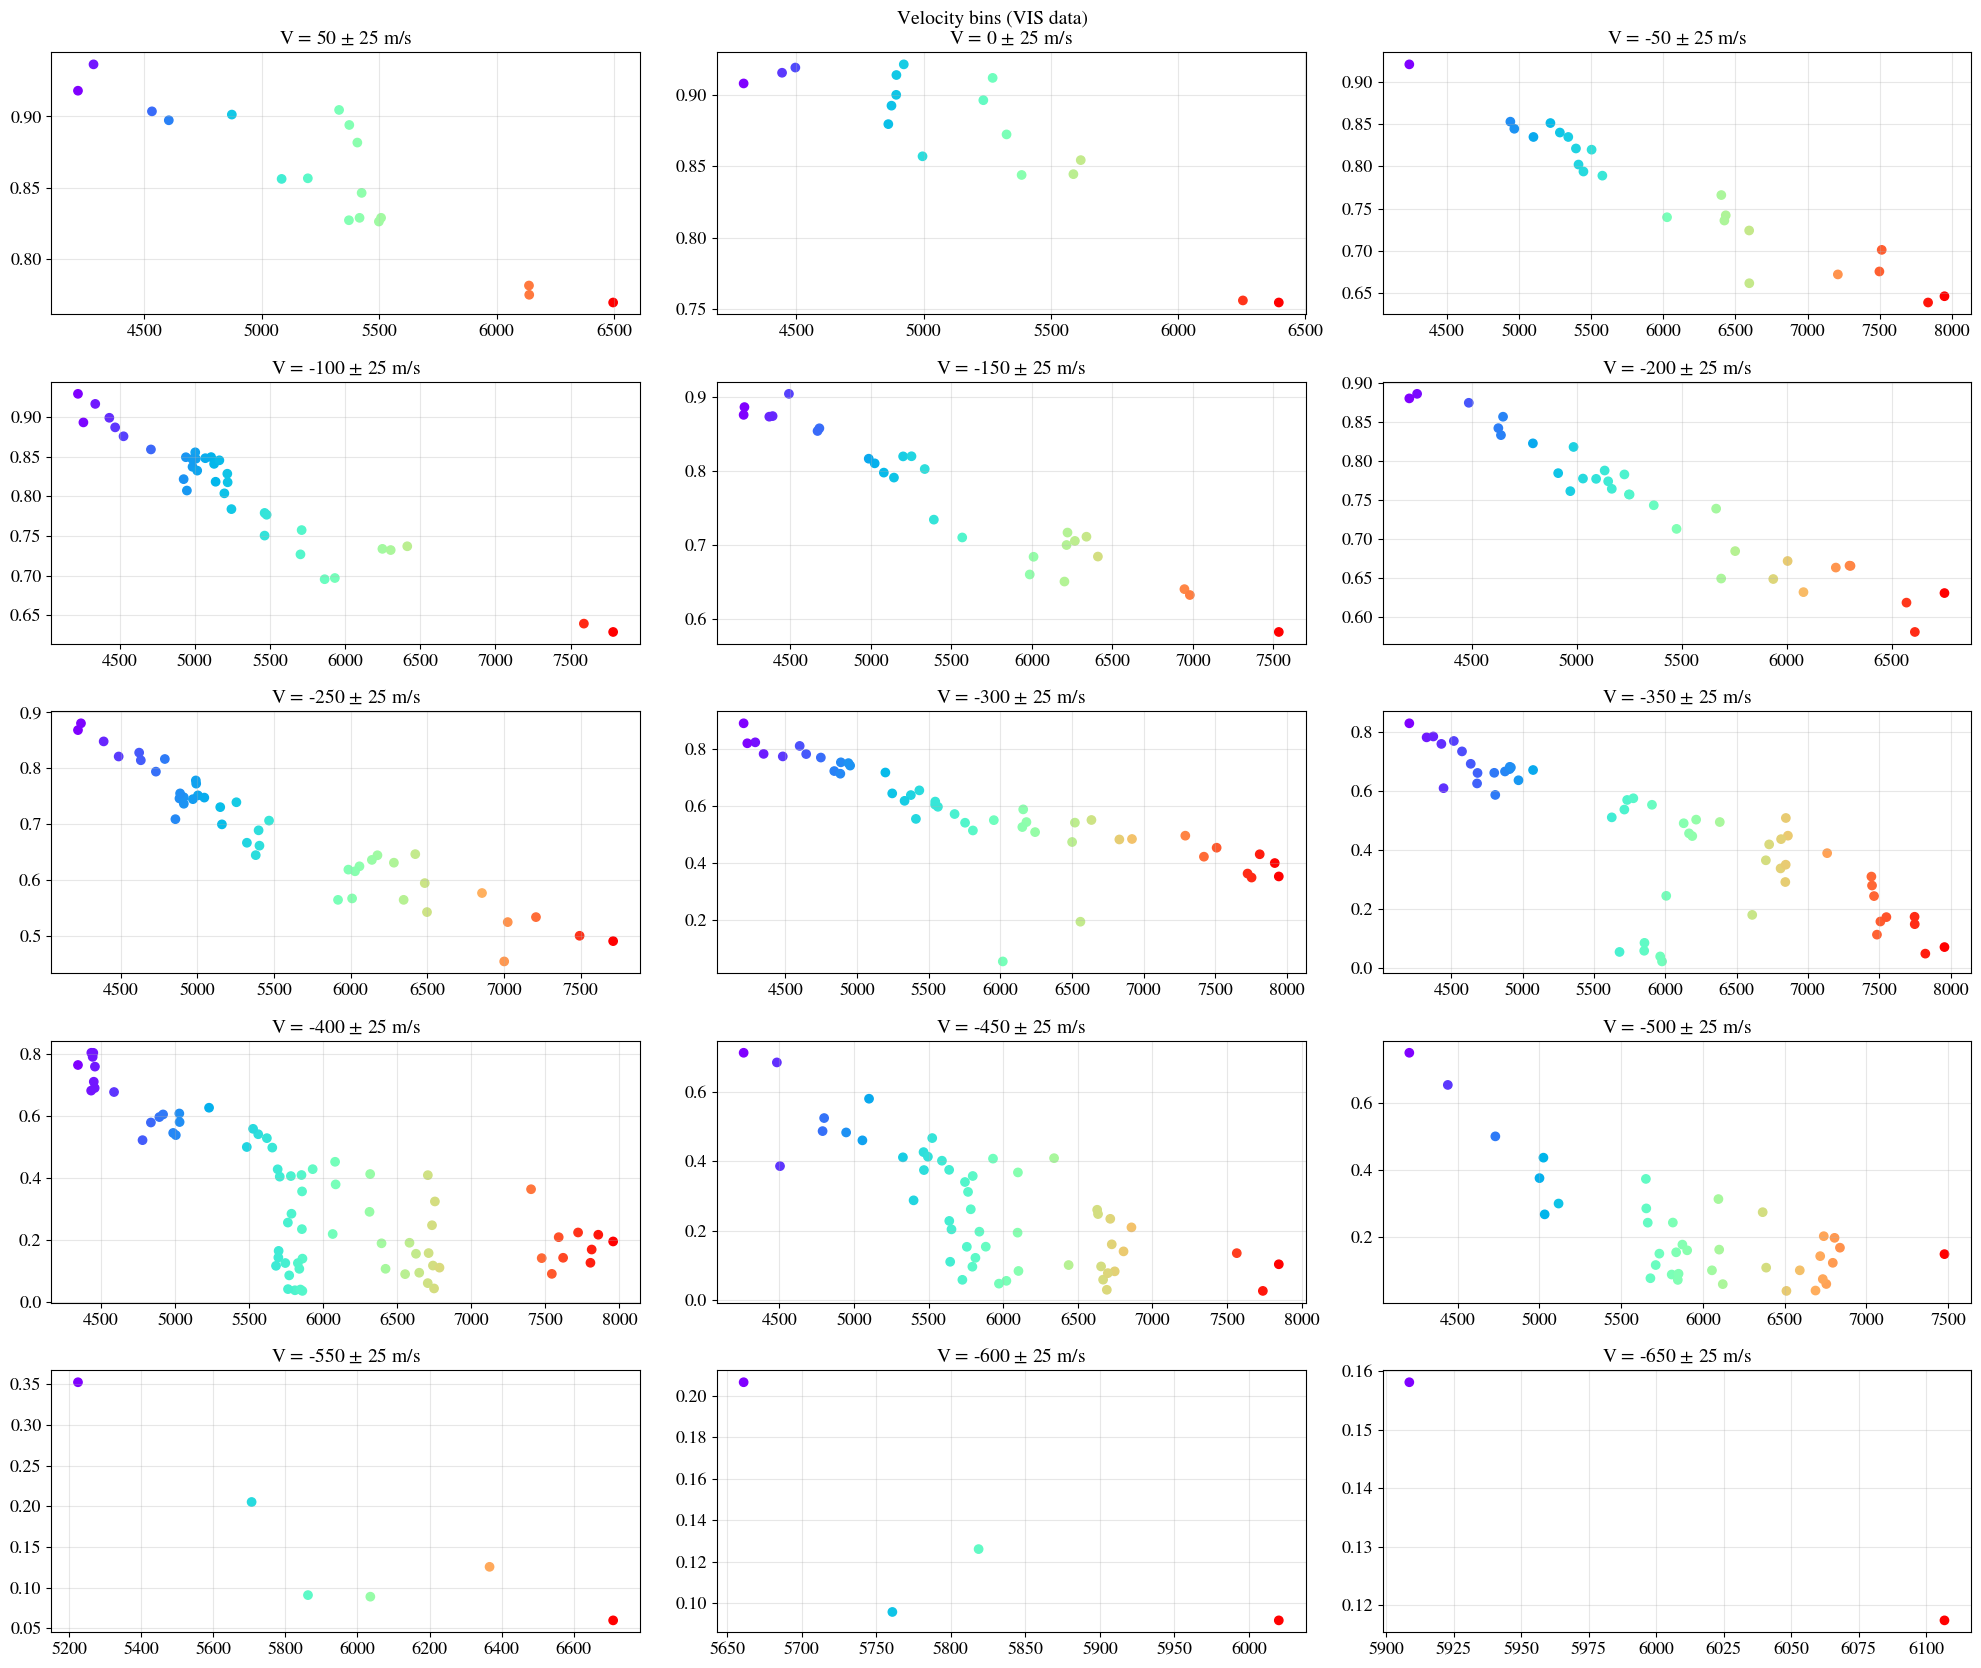

In [10]:
#Organize the dataframe wtih ascending velocities
SPA_listed = SPA_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA.append(SPA_listed[SPA_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Observed wavelength'],1-velocity_SPA[i]['Flux'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


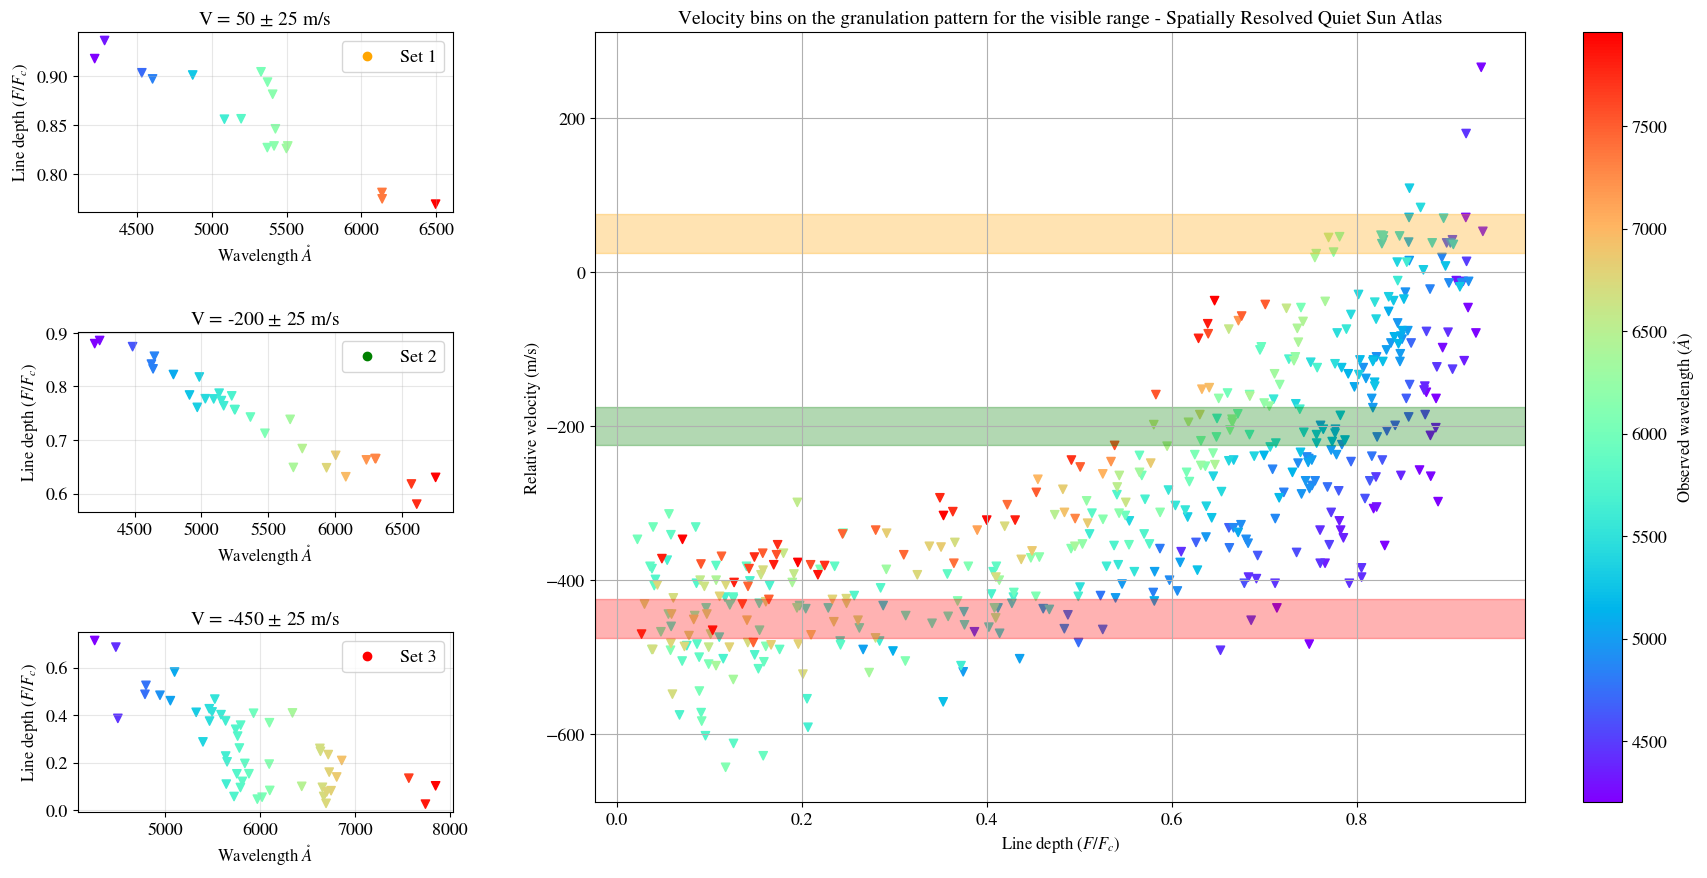

In [11]:
#Another form to graph
# Crear figura principal
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(1-SPA_data['Flux'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Velocity bins on the granulation pattern for the visible range - Spatially Resolved Quiet Sun Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity (m/s)',fontsize=12)
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=0
ax_inseti.scatter(velocity_SPA[i]['Observed wavelength'],1-velocity_SPA[i]['Flux'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow',marker='v')
ax_inseti.scatter([],[], c='orange', label='Set 1')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.grid(True, alpha=0.3)
ax_inseti.set_xlabel(r'Wavelength $\mathring{A}$')
ax_inseti.set_ylabel(r'Line depth $(F/F_{c})$')
ax_inseti.legend()

j=5
ax_insetj.scatter(velocity_SPA[j]['Observed wavelength'],1-velocity_SPA[j]['Flux'],c=velocity_SPA[j]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetj.scatter([],[], c='green', label='Set 2')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetj.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetj.grid(True, alpha=0.3)
ax_insetj.legend()

k=10
ax_insetk.scatter(velocity_SPA[k]['Observed wavelength'],1-velocity_SPA[k]['Flux'],c=velocity_SPA[k]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetk.scatter([],[], c='red', label='Set 3')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetk.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetk.grid(True, alpha=0.3)
ax_insetk.legend()


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

plt.show()

# fig.savefig('Velocity bins SPA_plot.pdf', bbox_inches='tight')

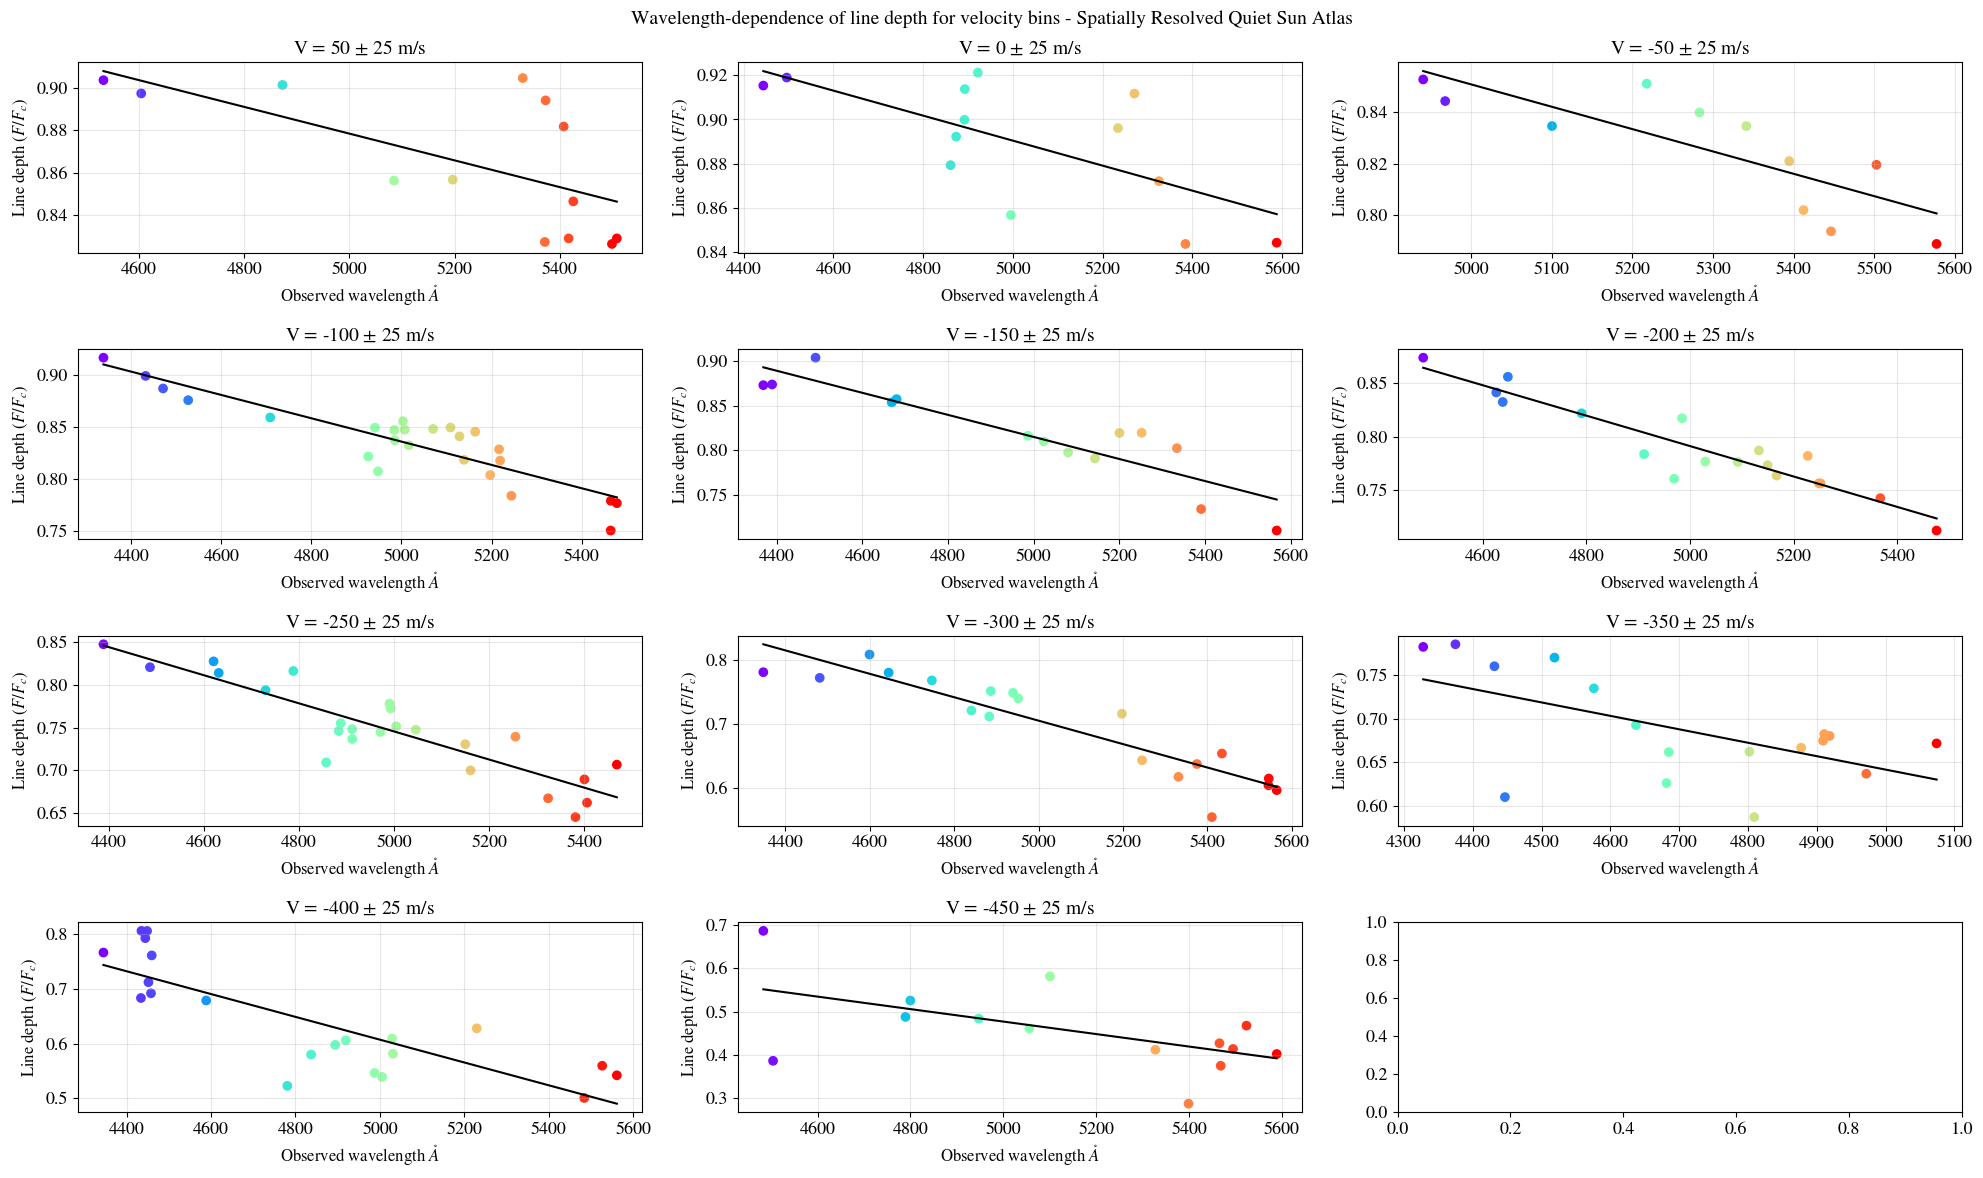

In [12]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []

for i in range(0,11):
    new_data = velocity_SPA[i][velocity_SPA[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]
    pol = Polynomial.fit(new_data['Observed wavelength'],1-new_data['Flux'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    fits_SPA.append([values_flux,flux_fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

values_param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
values_param_SPA.columns = ['A','B']
values_param_SPA = values_param_SPA.set_axis(markers[0:11], axis=0)

#Take just the values that we want
velocity_SPA_new = velocity_SPA[0:11]
markers_new = markers[0:11]

fig5, axes = plt.subplots(4, 3, figsize=(20, 12))
fig5.suptitle('Wavelength-dependence of line depth for velocity bins - Spatially Resolved Quiet Sun Atlas',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Observed wavelength'],1-wave_SPA[i]['Flux'],c=wave_SPA[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='k')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth $(F/F_{c})$',fontsize=12)
        ax.set_xlabel(r'Observed wavelength $\mathring{A}$',fontsize=12)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA.pdf')

In [13]:
values_param_SPA

,A,B
50,1.193762,-0.000063
0,1.172029,-0.000056
-50,1.284067,-0.000087
-100,1.395371,-0.000112
-150,1.432798,-0.000124
-200,1.502800,-0.000142
-250,1.571222,-0.000165
-300,1.623338,-0.000184
-350,1.412965,-0.000154
-400,1.645521,-0.000208


The rotation is not the reason of chromodependence, when we observe the center disk spectrum and measure the rotation is greater than the full disk integrated atlas.